In [1]:
%load_ext sql

In [2]:
%config SqlMagic.displaylimit=25

In [3]:
%sql duckdb:////Users/andyg/Code/Jupyter/DuckDbExperiments/vanguard.db
#%sql duckdb://

Connecting to 'duckdb:////Users/andyg/Code/Jupyter/DuckDbExperiments/vanguard.db'

In [4]:
%sql select * from FundPerformance

Running query in 'duckdb:////Users/andyg/Code/Jupyter/DuckDbExperiments/vanguard.db'

Date,AsDate,Fund,Perf,Decimal_Perf
Sep2007,2007-09-01 00:00:00,UKInvestmentGradeBondIndexFund,0.61,1.0061
Oct2007,2007-10-01 00:00:00,UKInvestmentGradeBondIndexFund,0.91,1.0091
Nov2007,2007-11-01 00:00:00,UKInvestmentGradeBondIndexFund,-0.03,0.9997
Dec2007,2007-12-01 00:00:00,UKInvestmentGradeBondIndexFund,1.43,1.0143
Jan2008,2008-01-01 00:00:00,UKInvestmentGradeBondIndexFund,-0.8,0.992
Feb2008,2008-02-01 00:00:00,UKInvestmentGradeBondIndexFund,-1.78,0.9822
Mar2008,2008-03-01 00:00:00,UKInvestmentGradeBondIndexFund,-0.69,0.9931
Apr2008,2008-04-01 00:00:00,UKInvestmentGradeBondIndexFund,0.52,1.0052
May2008,2008-05-01 00:00:00,UKInvestmentGradeBondIndexFund,-0.96,0.9904
Jun2008,2008-06-01 00:00:00,UKInvestmentGradeBondIndexFund,-0.92,0.9908


In [6]:
%sql select AsDate, Perf, Decimal_Perf, LN(Decimal_Perf), (EXP(SUM(LN(Decimal_Perf)) OVER (ORDER BY AsDate))-1)*100 AS cum \
from FundPerformance \
where fund = 'UKInvestmentGradeBondIndexFund' \
and AsDate between '2022-01-01' and '2022-12-31' \
order by AsDate asc

Running query in 'duckdb:////Users/andyg/Code/Jupyter/DuckDbExperiments/vanguard.db'

AsDate,Perf,Decimal_Perf,ln(Decimal_Perf),cum
2022-01-01 00:00:00,-2.97,0.9703,-0.03014997695088322,-2.969999999999995
2022-02-01 00:00:00,-2.16,0.9784,-0.021836694609174406,-5.0658479999999955
2022-03-01 00:00:00,-0.67,0.9933,-0.006722545760826811,-5.701906818399993
2022-04-01 00:00:00,-3.33,0.9667,-0.03386706951157731,-8.842033321347277
2022-05-01 00:00:00,-1.3,0.987,-0.01308523954865548,-10.027086888169755
2022-06-01 00:00:00,-2.19,0.9781,-0.022143364685689858,-11.99749368531885
2022-07-01 00:00:00,2.35,1.0235,0.023228126119207243,-9.92943478692383
2022-08-01 00:00:00,-6.09,0.9391,-0.06283330917156911,-15.414732208400173
2022-09-01 00:00:00,-7.9,0.921,-0.08229524272683016,-22.096968363936554
2022-10-01 00:00:00,3.94,1.0394,0.03864362359220453,-19.027588917475647


In [7]:
%sql select Fund, cum \
from \
 (select Fund, AsDate, Perf, Decimal_Perf, (EXP(SUM(LN(Decimal_Perf)) OVER (PARTITION BY Fund ORDER BY AsDate))-1)*100 AS cum \
 from FundPerformance \
 where AsDate between '2022-01-01' and '2022-12-31') x \
where AsDate = '2022-12-01' and Fund like '%UK%' \
order by cum desc

Running query in 'duckdb:////Users/andyg/Code/Jupyter/DuckDbExperiments/vanguard.db'

Fund,cum
FTSEUKEquityIncomeIndexFund,7.705259691968558
FTSEUKAllShareIndexUnitTrust,0.3315144659821412
UKShortTermInvestmentGradeBondIndexFund,-7.388969788567357
FTSEDevelopedEuropeexUKEquityIndexFund,-7.868899518807238
FTSEDevelopedWorldexUKEquityIndexFund,-8.288473666436435
FTSEDevelopedEuropeexUKUCITSETF,-12.762308823952983
ESGDevelopedWorldAllCapEquityIndexFundUK,-13.093002856601366
ActiveUKEquityFund,-14.362964858295324
UKInvestmentGradeBondIndexFund,-17.622102194869615
UKGiltUCITSETF,-27.031561057012066


Plot a histogram of the fund performance

In [8]:
import pandas as pd

df = pd.DataFrame(_)

In [11]:
import matplotlib.pyplot as plt

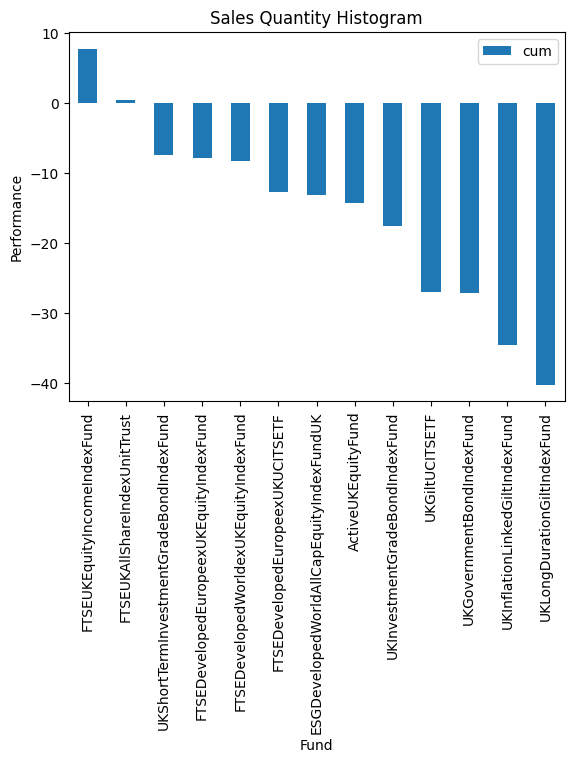

In [18]:
df.plot(kind='bar', x='Fund', y='cum', title='Sales Quantity Histogram')
plt.xlabel('Fund')
plt.ylabel('Performance')
plt.show()